In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
from scipy.stats import kurtosis, skew
import seaborn as sns
import pandas as pd


In [21]:
number_cells = 9 # O(n2) ?
number_generations = 100# O(n)
N = 1000 #resample per cell #(n) 
kenerations = 200
sigma_0 = 5
restrictive_constants = [5,10]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
[0.51, 0.33, 0.66, 0.74, 2.6799999999999997, 0.32999999999999996, -0.07000000000000006, 1.9400000000000002, -4.67, -0.3499999999999999, -1.44, -0.39999999999999997, -0.6000000000000001, 1.38, -0.41999999999999993, 1.65, -5.61, -3.37, 3.36, 3.31, 0.74, -1.16, -0.17, -0.68, 0.99, -1.3800000000000001, 0.32999999

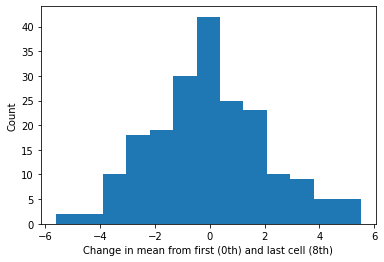

In [30]:
#null model free restriction 
hist=[]
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):

            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=N))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)

        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))

    #print(sigma[0]/2+sigma[-1]/2)
    hist.append(mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("Count")
plt.savefig('../data/null_low_restriction'+str(sigma_0)+'.png')

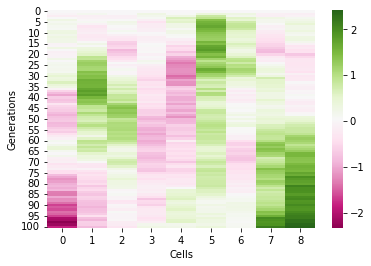

In [31]:
s = sns.heatmap(mus,cmap="PiYG");
s.set(xlabel='Cells',ylabel='Generations')
s;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


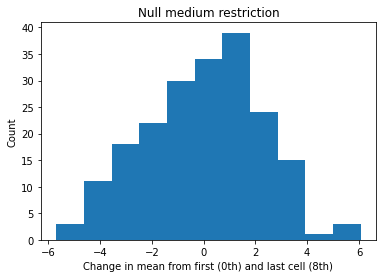

In [32]:
# null model medium restriction 
hist=[]
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N) 
            mu_loop = mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/5))) 
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    hist.append(mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])
    #print(hist[-1])
##print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("Count")
plt.title('Null medium restriction')
plt.savefig('../data/null_med_restriction'+str(sigma_0)+'.png')

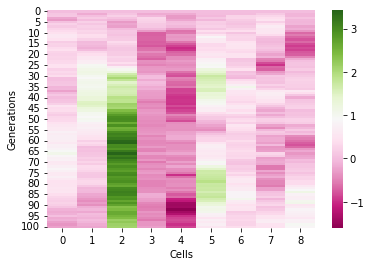

In [33]:
s = sns.heatmap(mus,cmap="PiYG");
s.set(xlabel='Cells',ylabel='Generations')
s;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


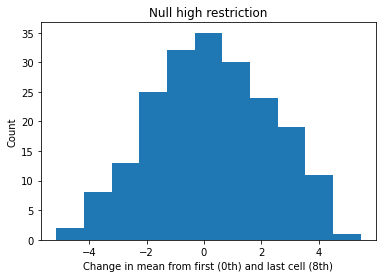

In [29]:
# null model high restriction 
hist=[]
for k in range(kenerations):
    print(k)

    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N) 
            mu_loop = mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/10))) 
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    #print(sigma[0]/2+sigma[-1]/2)
    hist.append(mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8])
#print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("Count")
plt.title('Null high restriction')
plt.savefig('../data/null_high_restriction'+str(sigma_0)+'.png')

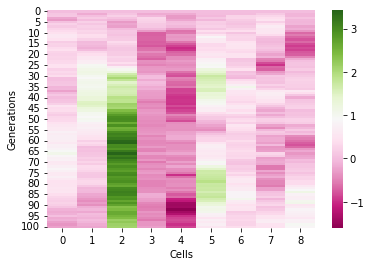

In [34]:
s = sns.heatmap(mus,cmap="PiYG");
s.set(xlabel='Cells',ylabel='Generations')
s;

[0.44999999999999996, 1.1700000000000002, 0.95, -2.9699999999999998, -2.6100000000000003, -1.89, -0.3899999999999999, 1.31, 2.86, -1.65, 3.3, -0.5799999999999998, -1.9000000000000001, 2.46, -0.3500000000000001, -3.27, -3.75, 1.4, 4.24, -3.43, -1.0699999999999998, -0.7999999999999998, -1.8900000000000001, -0.03, -1.49, -2.4499999999999997, 0.7, -0.040000000000000036, -2.01, -1.97, 2.2, -0.69, 1.06, 3.0, -0.99, 1.2000000000000002, -4.300000000000001, 0.41000000000000014, 2.3, -1.73, 3.61, 0.9299999999999999, -0.31, 1.81, -5.16, -1.1400000000000001, -0.25, -1.33, 0.5, 0.21999999999999997, 2.29, 1.76, 3.7199999999999998, -0.09000000000000008, 0.6000000000000001, 0.6500000000000001, -2.06, 1.56, 4.31, -4.0600000000000005, 0.09000000000000008, -1.0, -1.17, -1.43, -2.48, 1.87, -5.109999999999999, 2.46, 4.05, -1.9700000000000002, -1.79, -1.7400000000000002, -1.6800000000000002, 1.76, 2.16, -1.22, 0.86, -0.75, -2.58, 2.13, 0.30999999999999983, -2.4899999999999998, -2.05, 1.11, 0.98, 0.109999999

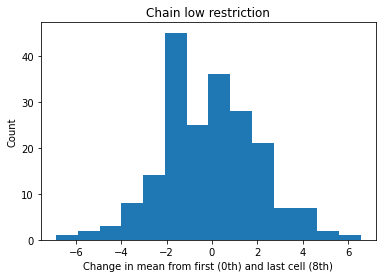

In [35]:
#second model
hist=[]
for k in range(kenerations):
    #print(k)
    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=N))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
#    print(( (sigma[0]^2) + (sigma[-1]^2) )^0.5)
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8]))
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("Count")
plt.title('Chain low restriction')
plt.savefig('../data/chain_low_restriction'+str(sigma_0)+'.png')

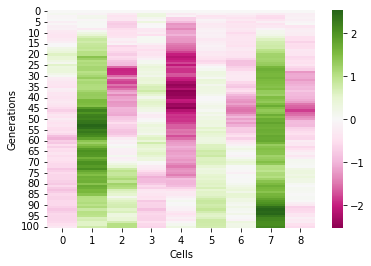

In [37]:
s = sns.heatmap(mus,cmap="PiYG");
s.set(xlabel='Cells',ylabel='Generations')
s;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
[-0.48, 0.5800000000000001, 2.08, 0.48, -1.31, 2.21, -1.23, 0.62, 5.96, -2.13, 1.5, 0.62, 1.12, -0.8099999999999999, 4.71, 3.7399999999999998, -1.83, 2.41, -0.41000000000000003, -3.61, 0.21000000000000002, 1.0799999999999998, 0.37, -0.020000000000000004, -3.0300000000000002, -0.25, -1.98, -0.30000000000000004

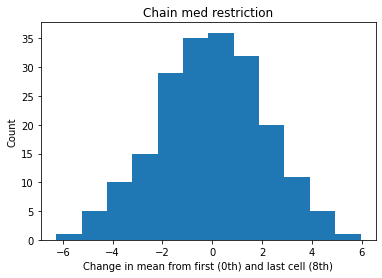

In [39]:
#second model medium restriction
hist = []
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/5)))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
#    print(( (sigma[0]^2) + (sigma[-1]^2) )^0.5)
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8]))
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("Count")
plt.title('Chain med restriction')
plt.savefig('../data/chain_med_restriction'+str(sigma_0)+'.png')

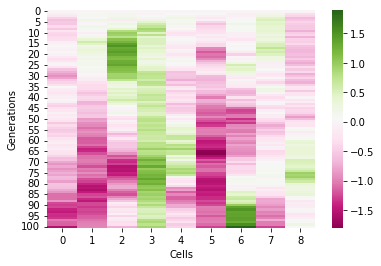

In [40]:
s = sns.heatmap(mus,cmap="PiYG");
s.set(xlabel='Cells',ylabel='Generations')
s;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
[-1.58, 1.32, 2.04, -0.59, 2.1399999999999997, 2.88, -0.6499999999999999, 0.09999999999999964, 2.13, -1.7400000000000002, -0.3400000000000001, 0.52, 0.5499999999999998, 1.2600000000000002, 0.26000000000000006, 4.28, 1.71, 1.9, -3.56, 2.12, 0.47, -3.3, 0.7600000000000002, -2.35, -0.7, 1.24, 0.36, 2.38999999999

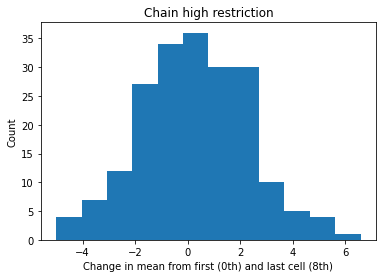

In [41]:
##### second model high restriction
hist = []
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]
            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/10)))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
#    print(( (sigma[0]^2) + (sigma[-1]^2) )^0.5)
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8]))
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("Count")
plt.title('Chain high restriction')
plt.savefig('../data/chain_high_restriction'+str(sigma_0)+'.png')

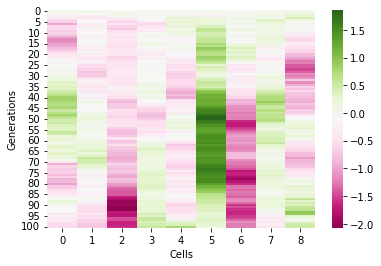

In [42]:
s = sns.heatmap(mus,cmap="PiYG");
s.set(xlabel='Cells',ylabel='Generations')
s;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
[-4.2700000000000005, 1.5499999999999998, -0.83, 4.19, -4.13, -1.19, -4.359999999999999, -1.71, -4.83, -4.16, -2.2800000000000002, -2.88, 0.31000000000000005, 1.94, 0.68, 1.74, -1.67, -0.27, 0.3899999999999999, -2.81, 5.51, -1.5800000000000003, 7.52, 3.6, 3.7300000000000004, 0.8200000000000001, -1.13, 0.89000

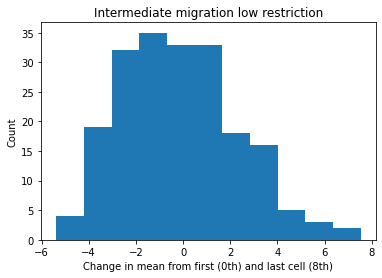

In [43]:
#intermediate migration medium restriction
hist = []
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]

            if i == 2:
                mu_loop = [mu[start],mu[6],mu[end]] # mu[:i] + mu[i+1:]

            if i == 6:
                mu_loop = [mu[start],mu[2],mu[end]] # mu[:i] + mu[i+1:]


            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=N))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8]))
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("Count")
plt.title('Intermediate migration low restriction')
plt.savefig('../data/inter_mig_low_restriction'+str(sigma_0)+'.png')

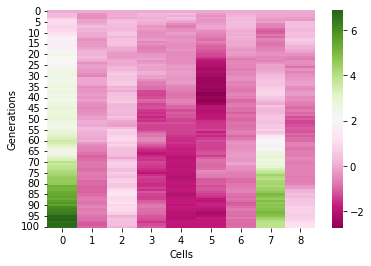

In [44]:
s = sns.heatmap(mus,cmap="PiYG");
s.set(xlabel='Cells',ylabel='Generations')
s;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
[2.12, -0.9400000000000001, -3.62, 0.30000000000000004, 0.9, 1.85, 0.8700000000000001, 3.5, -0.030000000000000027, 0.06999999999999998, 5.4399999999999995, -0.14, 0.5900000000000001, 2.6799999999999997, -3.31, 2.35, 0.28, 1.25, 0.49, 5.65, 3.14, 0.10000000000000003, 2.41, -0.04999999999999999, -0.590000000000

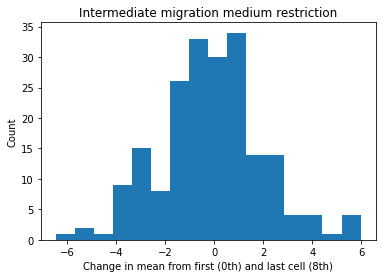

In [45]:
#intermediate migration medium restriction
hist = []
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]

            if i == 2:
                mu_loop = [mu[start],mu[6],mu[end]] # mu[:i] + mu[i+1:]

            if i == 6:
                mu_loop = [mu[start],mu[2],mu[end]] # mu[:i] + mu[i+1:]


            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/5)))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8]))
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("Count")
plt.title('Intermediate migration medium restriction')
plt.savefig('../data/inter_mig_mid_restriction'+str(sigma_0)+'.png')

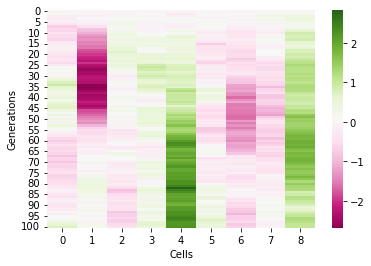

In [46]:
s = sns.heatmap(mus,cmap="PiYG");
s.set(xlabel='Cells',ylabel='Generations')
s;

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
[-2.71, 1.68, -0.32999999999999996, 0.93, -2.96, -0.69, -1.74, 5.09, -1.33, -3.69, 1.33, -2.14, -1.3299999999999998, -2.35, 2.54, 0.9099999999999999, -0.32999999999999996, 1.32, -0.27, 1.39, -1.5899999999999999, -0.56, 0.7899999999999999, 3.25, 6.02, -1.1600000000000001, 3.46, -0.54, 1.6800000000000002, 2.25,

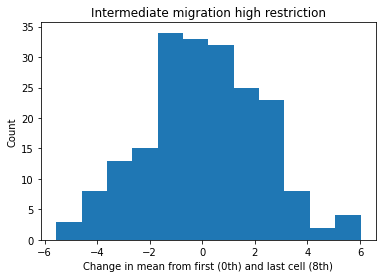

In [47]:
#intermediate migration high restriction
hist = []
for k in range(kenerations):
    print(k)
    mu = [0] * number_cells
    sigma = [sigma_0] * number_cells
    s=[0] * number_cells
    mus=[mu]
    for trial in range(number_generations):
        temp_mu = [0] * number_cells
        temp_sigma = [1] * number_cells 
        for i, mean in enumerate(mu):
            s[i] = np.random.normal(loc=mean,scale=sigma[i],size=N)
            mu_loop = mu[:i] + mu[i+1:]
            start=i-1 # or 0
            end = i + 1 # or len(range(number_generations))
            check = True
            if start < 0:
                start = 0
                mu_loop = [mu[end]]
                check = False
            if end > len(mu)-1:
                end = -1
                mu_loop = [mu[start]]
                check = False
            if check:
                mu_loop = [mu[start],mu[end]] # mu[:i] + mu[i+1:]

            if i == 2:
                mu_loop = [mu[start],mu[6],mu[end]] # mu[:i] + mu[i+1:]

            if i == 6:
                mu_loop = [mu[start],mu[2],mu[end]] # mu[:i] + mu[i+1:]


            for j, meanj in enumerate(mu_loop):
                np.append(s[i],np.random.normal(loc=mean,scale=sigma[i],size=int(N/10)))
            temp_mu[i] = round(np.mean(s[i]),2)
            temp_sigma[i] = round(np.std(s[i]),2)
        mu = temp_mu
        sigma = temp_sigma
        mus.append(mu)
    mus = pd.DataFrame(mus,columns=range(number_cells),index=range(number_generations+1))
    #s = sns.heatmap(mus,cmap="PiYG");
    #s.set(xlabel='Cells',ylabel='Generations')
    #s;
    hist.append((mus.iloc[number_generations-1,0]-mus.iloc[number_generations-1,8]))
print(hist)
plt.hist(hist,bins='auto')
plt.xlabel("Change in mean from first (0th) and last cell (8th)")
plt.ylabel("Count")
plt.title('Intermediate migration high restriction')
plt.savefig('../data/chain_high_restriction'+str(sigma_0)+'.png')

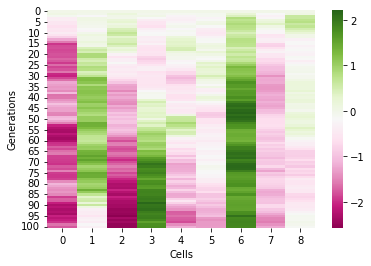

In [48]:
s = sns.heatmap(mus,cmap="PiYG");
s.set(xlabel='Cells',ylabel='Generations')
s;

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



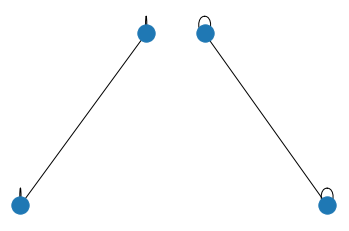

In [12]:
#networkX resampling 
import networkx as nx
G = nx.Graph()
generations_array = [0]*number_generations
G.add_node(1,ID=1,sampling=[[0]]*number_generations,
           mu=[1]*number_generations,
           sigma=[0]*number_generations)
G.add_node(2,ID=1,sampling=[0]*number_generations,
           mu=[1]*number_generations,
           sigma=[0]*number_generations)
#
G.add_edge(1,2)
G.add_edge(1,1)
G.add_edge(2,2)



#elist = [(2, 3), (1, 4), (4, 2)]
#G.add_edges_from(elist)
#elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
#G.add_weighted_edges_from(elist)

import matplotlib.pyplot as plt
#G = nx.cubical_graph()
subax1 = plt.subplot(121)
nx.draw(G) # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G)#, pos=nx.circular_layout(G), node_color='r', edge_color='b')

for trial in range(number_generations):
    for node in G.nodes(data=True):
        print(node)

for node in G.edges(data=True):
    print(node)

In [28]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg